In [ ]:
pip install scikit-fuzzy matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.8 MB/s eta 0:00:00


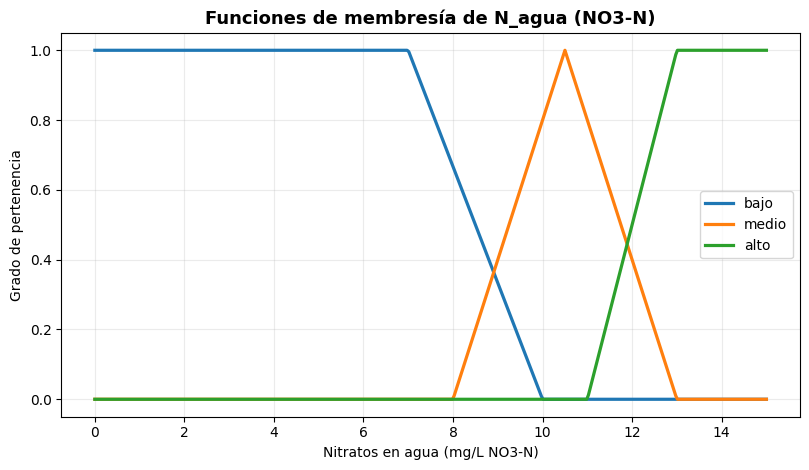

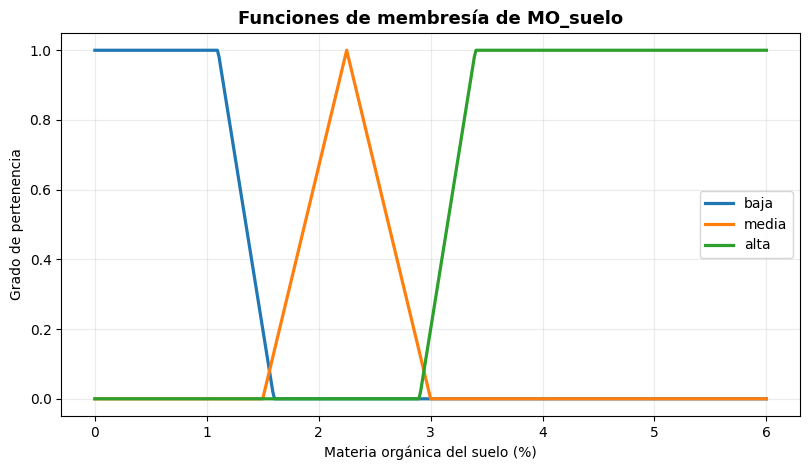

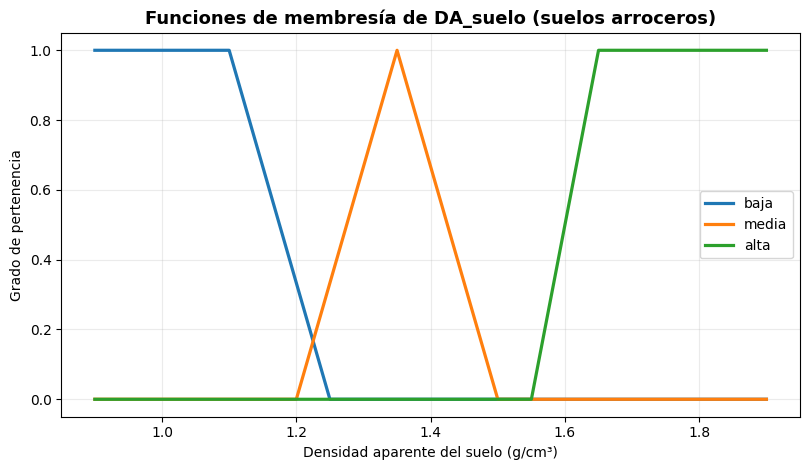

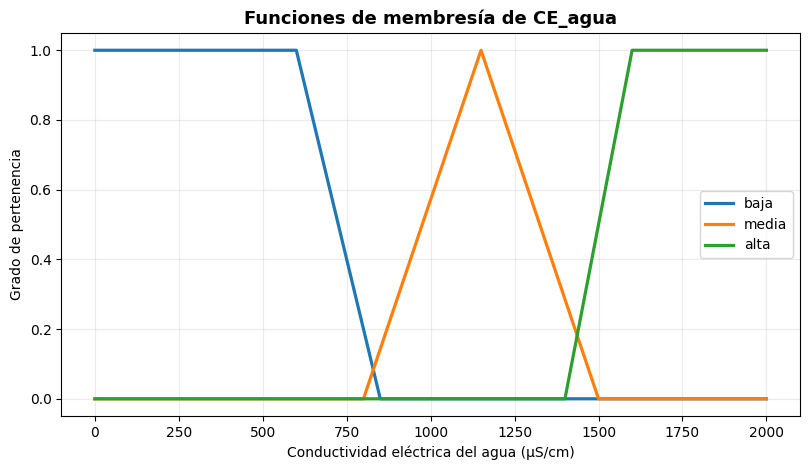

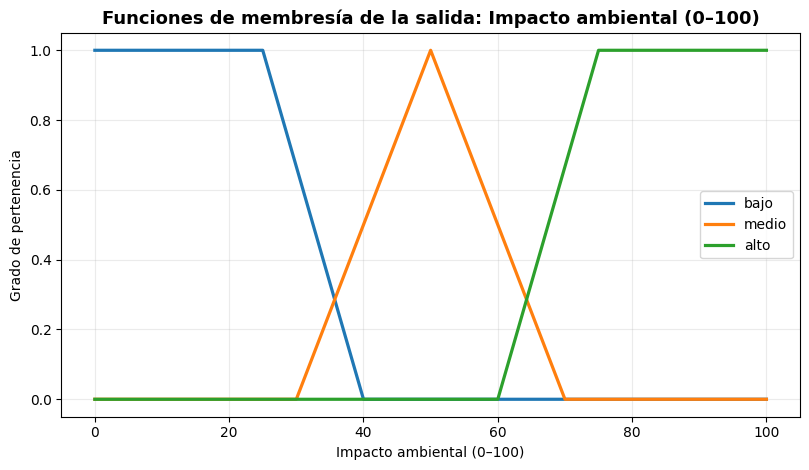

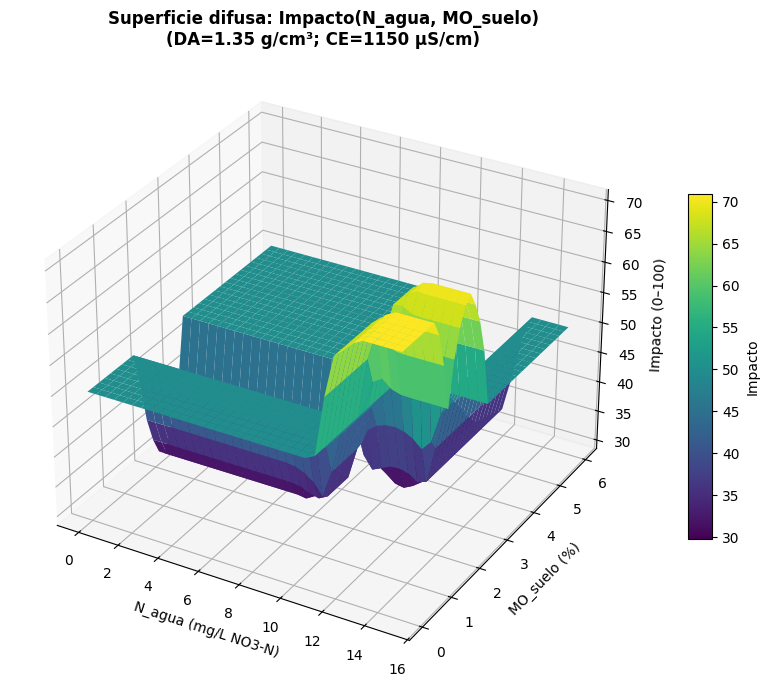

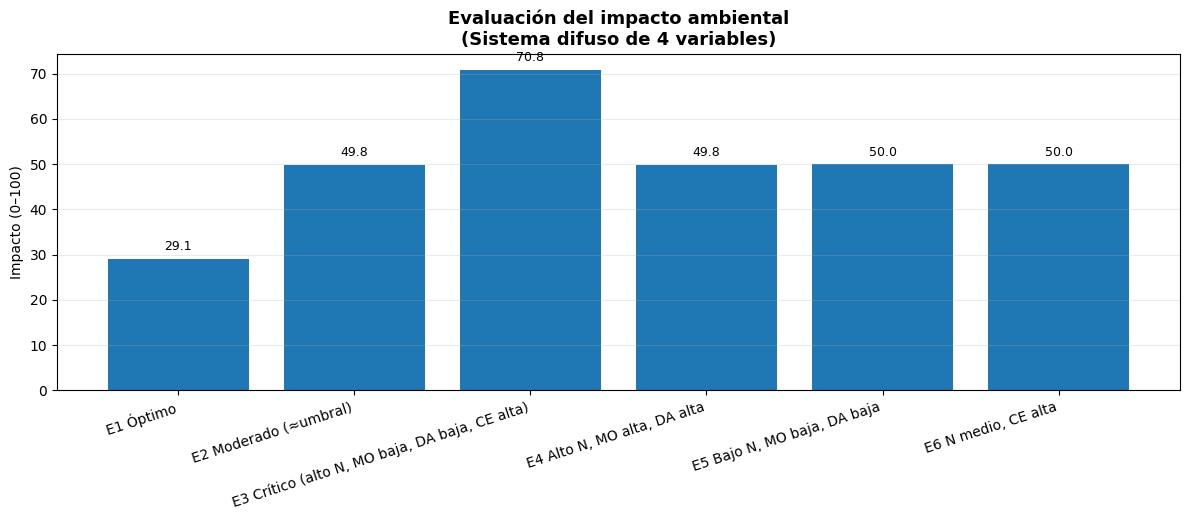


✅ Listo. Archivos generados:
- fig_mf_N_agua_NO3N.png
- fig_mf_MO_suelo.png
- fig_mf_DA_suelo.png
- fig_mf_CE_agua.png
- fig_mf_Impacto.png
- fig_superficie_fuzzy_NO3N_MO.png
- fig_escenarios_impacto.png
- tabla_escenarios_impacto.txt


In [ ]:
# =========================
# 0) SETUP COLAB
# =========================
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl


# =========================
# 1) CONFIGURACIÓN DE RANGOS
# =========================
# Nitratos en agua (mg/L como NO3-N)
N_min, N_max = 0, 15

# Materia orgánica (%)
MO_min, MO_max = 0, 6

# Densidad aparente (g/cm3) suelos arroceros
DA_min, DA_max = 0.9, 1.9

# Conductividad eléctrica del agua (µS/cm)
CE_min, CE_max = 0, 2000

# Salida Impacto (0–100)
I_min, I_max = 0, 100


# =========================
# 2) UNIVERSOS (DOMINIOS)
# =========================
N  = ctrl.Antecedent(np.linspace(N_min,  N_max,  401), 'N_agua_NO3N')
MO = ctrl.Antecedent(np.linspace(MO_min, MO_max, 401), 'MO_suelo')
DA = ctrl.Antecedent(np.linspace(DA_min, DA_max, 401), 'DA_suelo')
CE = ctrl.Antecedent(np.linspace(CE_min, CE_max, 401), 'CE_agua')

Impacto = ctrl.Consequent(np.linspace(I_min, I_max, 401), 'Impacto')


# =========================
# 3) FUNCIONES DE MEMBRESÍA
# =========================
# MO (%): bajo <1.5, medio 1.5–3, alto >3
MO['baja']  = fuzz.trapmf(MO.universe, [0, 0, 1.10, 1.60])
MO['media'] = fuzz.trimf(MO.universe, [1.50, 2.25, 3.00])
MO['alta']  = fuzz.trapmf(MO.universe, [2.90, 3.40, 6.00, 6.00])

# N_agua (NO3-N mg/L): bajo <10, medio cerca umbral, alto >10–15
N['bajo']  = fuzz.trapmf(N.universe, [0, 0, 7.0, 10.0])
N['medio'] = fuzz.trimf(N.universe, [8.0, 10.5, 13.0])
N['alto']  = fuzz.trapmf(N.universe, [11.0, 13.0, 15.0, 15.0])

# DA (g/cm3): bajo <1.2, medio 1.2–1.5, alto >1.6
# (baja DA = suelo suelto/poroso = mayor lixiviación)
DA['baja']  = fuzz.trapmf(DA.universe, [DA_min, DA_min, 1.10, 1.25])
DA['media'] = fuzz.trimf(DA.universe, [1.20, 1.35, 1.50])
DA['alta']  = fuzz.trapmf(DA.universe, [1.55, 1.65, DA_max, DA_max])

# CE_agua (µS/cm): bajo <800, medio 800–1500, alto >1500
CE['baja']  = fuzz.trapmf(CE.universe, [0, 0, 600, 850])
CE['media'] = fuzz.trimf(CE.universe, [800, 1150, 1500])
CE['alta']  = fuzz.trapmf(CE.universe, [1400, 1600, 2000, 2000])

# Salida Impacto (0–100)
Impacto['bajo']  = fuzz.trapmf(Impacto.universe, [0, 0, 25, 40])
Impacto['medio'] = fuzz.trimf(Impacto.universe, [30, 50, 70])
Impacto['alto']  = fuzz.trapmf(Impacto.universe, [60, 75, 100, 100])


# =========================
# 4) BASE DE REGLAS (MAMDANI)
# =========================
rules = [
    # --- N alto ---
    ctrl.Rule(N['alto'] & MO['baja'] & DA['baja'], Impacto['alto']),
    ctrl.Rule(N['alto'] & MO['baja'] & DA['media'], Impacto['alto']),
    ctrl.Rule(N['alto'] & MO['baja'] & DA['alta'], Impacto['alto']),
    ctrl.Rule(N['alto'] & MO['media'] & DA['baja'], Impacto['alto']),
    ctrl.Rule(N['alto'] & MO['media'] & DA['media'], Impacto['alto']),
    ctrl.Rule(N['alto'] & MO['media'] & DA['alta'], Impacto['medio']),
    ctrl.Rule(N['alto'] & MO['alta'] & DA['baja'], Impacto['medio']),
    ctrl.Rule(N['alto'] & MO['alta'] & DA['media'], Impacto['medio']),
    ctrl.Rule(N['alto'] & MO['alta'] & DA['alta'], Impacto['medio']),

    # --- N medio ---
    ctrl.Rule(N['medio'] & MO['baja'] & DA['baja'], Impacto['alto']),
    ctrl.Rule(N['medio'] & MO['baja'] & DA['media'], Impacto['medio']),
    ctrl.Rule(N['medio'] & MO['baja'] & DA['alta'], Impacto['medio']),
    ctrl.Rule(N['medio'] & MO['media'] & DA['baja'], Impacto['medio']),
    ctrl.Rule(N['medio'] & MO['media'] & DA['media'], Impacto['medio']),
    ctrl.Rule(N['medio'] & MO['media'] & DA['alta'], Impacto['bajo']),
    ctrl.Rule(N['medio'] & MO['alta'] & DA['baja'], Impacto['medio']),
    ctrl.Rule(N['medio'] & MO['alta'] & DA['media'], Impacto['bajo']),
    ctrl.Rule(N['medio'] & MO['alta'] & DA['alta'], Impacto['bajo']),

    # --- N bajo ---
    ctrl.Rule(N['bajo'] & MO['baja'] & DA['baja'], Impacto['medio']),
    ctrl.Rule(N['bajo'] & MO['baja'] & DA['media'], Impacto['medio']),
    ctrl.Rule(N['bajo'] & MO['baja'] & DA['alta'], Impacto['bajo']),
    ctrl.Rule(N['bajo'] & MO['media'] & DA['baja'], Impacto['bajo']),
    ctrl.Rule(N['bajo'] & MO['media'] & DA['media'], Impacto['bajo']),
    ctrl.Rule(N['bajo'] & MO['media'] & DA['alta'], Impacto['bajo']),
    ctrl.Rule(N['bajo'] & MO['alta'] & DA['alta'], Impacto['bajo']),

    # --- CE modulador ---
    ctrl.Rule(CE['alta'] & N['alto'], Impacto['alto']),
    ctrl.Rule(CE['alta'] & N['medio'] & MO['baja'], Impacto['alto']),
    ctrl.Rule(CE['alta'] & N['medio'] & MO['media'], Impacto['medio']),
    ctrl.Rule(CE['alta'] & N['bajo'] & MO['baja'], Impacto['medio']),

    # --- Respaldo ---
    ctrl.Rule(N['bajo'] | N['medio'] | N['alto'], Impacto['medio']),
]

system = ctrl.ControlSystem(rules)


# =========================
# 5) FUNCIÓN PARA PLOT BONITO (SHOW + SAVE)
# =========================
def plot_mf(var, terms, title, xlabel, filename):
    plt.figure(figsize=(8.2, 4.8))
    for t in terms:
        plt.plot(var.universe, var[t].mf, linewidth=2.3, label=t)

    plt.title(title, fontsize=13, weight='bold')
    plt.xlabel(xlabel)
    plt.ylabel("Grado de pertenencia")
    plt.grid(alpha=0.25)
    plt.legend()
    plt.tight_layout()

    # Mostrar en Colab
    plt.show()

    # Guardar para tesis
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.close()


# =========================
# 6) FIGURAS DE MEMBRESÍAS
# =========================
plot_mf(N,  ['bajo', 'medio', 'alto'],
        "Funciones de membresía de N_agua (NO3-N)",
        "Nitratos en agua (mg/L NO3-N)",
        "fig_mf_N_agua_NO3N.png")

plot_mf(MO, ['baja', 'media', 'alta'],
        "Funciones de membresía de MO_suelo",
        "Materia orgánica del suelo (%)",
        "fig_mf_MO_suelo.png")

plot_mf(DA, ['baja', 'media', 'alta'],
        "Funciones de membresía de DA_suelo (suelos arroceros)",
        "Densidad aparente del suelo (g/cm³)",
        "fig_mf_DA_suelo.png")

plot_mf(CE, ['baja', 'media', 'alta'],
        "Funciones de membresía de CE_agua",
        "Conductividad eléctrica del agua (µS/cm)",
        "fig_mf_CE_agua.png")

plot_mf(Impacto, ['bajo', 'medio', 'alto'],
        "Funciones de membresía de la salida: Impacto ambiental (0–100)",
        "Impacto ambiental (0–100)",
        "fig_mf_Impacto.png")


# =========================
# 7) SUPERFICIE 3D: N vs MO (DA y CE fijos)
# =========================
DA_fixed = 1.35    # valor medio (ideal)
CE_fixed = 1150    # valor medio (adecuado)

N_grid = np.linspace(N_min, N_max, 35)
MO_grid = np.linspace(MO_min, MO_max, 35)
Z = np.zeros((len(MO_grid), len(N_grid)))

for i, mo in enumerate(MO_grid):
    for j, n in enumerate(N_grid):
        sim = ctrl.ControlSystemSimulation(system)
        sim.input['N_agua_NO3N'] = float(n)
        sim.input['MO_suelo'] = float(mo)
        sim.input['DA_suelo'] = float(DA_fixed)
        sim.input['CE_agua'] = float(CE_fixed)
        sim.compute()
        Z[i, j] = sim.output['Impacto']

N_mesh, MO_mesh = np.meshgrid(N_grid, MO_grid)

fig = plt.figure(figsize=(10.5, 7.0))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(
    N_mesh, MO_mesh, Z,
    cmap="viridis",
    edgecolor="none",
    antialiased=True
)

ax.set_title("Superficie difusa: Impacto(N_agua, MO_suelo)\n(DA=1.35 g/cm³; CE=1150 µS/cm)",
             fontsize=12, weight='bold')
ax.set_xlabel("N_agua (mg/L NO3-N)")
ax.set_ylabel("MO_suelo (%)")
ax.set_zlabel("Impacto (0–100)")

fig.colorbar(surf, shrink=0.55, aspect=14, label="Impacto")
plt.tight_layout()

# Mostrar
plt.show()

# Guardar
plt.savefig("fig_superficie_fuzzy_NO3N_MO.png", dpi=300, bbox_inches="tight")
plt.close()


# =========================
# 8) ESCENARIOS (TABLA + BARRAS)
# =========================
scenarios = {
    "E1 Óptimo": {"N_agua_NO3N": 3.0,  "MO_suelo": 4.0, "DA_suelo": 1.65, "CE_agua": 900},
    "E2 Moderado (≈umbral)": {"N_agua_NO3N": 10.0, "MO_suelo": 2.2, "DA_suelo": 1.35, "CE_agua": 1150},
    "E3 Crítico (alto N, MO baja, DA baja, CE alta)": {"N_agua_NO3N": 13.0, "MO_suelo": 1.0, "DA_suelo": 1.10, "CE_agua": 1700},
    "E4 Alto N, MO alta, DA alta": {"N_agua_NO3N": 13.0, "MO_suelo": 4.0, "DA_suelo": 1.65, "CE_agua": 1100},
    "E5 Bajo N, MO baja, DA baja": {"N_agua_NO3N": 4.0,  "MO_suelo": 1.0, "DA_suelo": 1.10, "CE_agua": 900},
    "E6 N medio, CE alta": {"N_agua_NO3N": 10.5, "MO_suelo": 2.5, "DA_suelo": 1.35, "CE_agua": 1750},
}

names, impacts = [], []
for name, v in scenarios.items():
    sim = ctrl.ControlSystemSimulation(system)
    sim.input['N_agua_NO3N'] = v["N_agua_NO3N"]
    sim.input['MO_suelo'] = v["MO_suelo"]
    sim.input['DA_suelo'] = v["DA_suelo"]
    sim.input['CE_agua'] = v["CE_agua"]
    sim.compute()
    names.append(name)
    impacts.append(sim.output['Impacto'])

# Guardar tabla para Word
lines = ["Escenario\tN_agua_NO3N (mg/L)\tMO_suelo (%)\tDA_suelo (g/cm3)\tCE_agua (uS/cm)\tImpacto (0–100)"]
for name, imp in zip(names, impacts):
    v = scenarios[name]
    lines.append(f"{name}\t{v['N_agua_NO3N']:.2f}\t{v['MO_suelo']:.2f}\t{v['DA_suelo']:.2f}\t{v['CE_agua']:.0f}\t{imp:.2f}")

with open("tabla_escenarios_impacto.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(lines))

# Barras bonitas con etiquetas
plt.figure(figsize=(12, 5.3))
bars = plt.bar(names, impacts)

plt.xticks(rotation=18, ha='right')
plt.ylabel("Impacto (0–100)")
plt.title("Evaluación del impacto ambiental\n(Sistema difuso de 4 variables)", fontsize=13, weight='bold')
plt.grid(axis="y", alpha=0.25)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1.2,
             f"{yval:.1f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()

# Mostrar
plt.show()

# Guardar
plt.savefig("fig_escenarios_impacto.png", dpi=300, bbox_inches="tight")
plt.close()

print("\n✅ Listo. Archivos generados:")
print("- fig_mf_N_agua_NO3N.png")
print("- fig_mf_MO_suelo.png")
print("- fig_mf_DA_suelo.png")
print("- fig_mf_CE_agua.png")
print("- fig_mf_Impacto.png")
print("- fig_superficie_fuzzy_NO3N_MO.png")
print("- fig_escenarios_impacto.png")
print("- tabla_escenarios_impacto.txt")
